In [1]:
import pandas as pd

D:\anaconda3\envs\pytorch\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda3\envs\pytorch\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
D:\anaconda3\envs\pytorch\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [224]:
diabetic_data=pd.read_csv(r"D:\OneDrive\桌面\ML\diabetic_data.csv")

In [225]:
diabetic_data['encounter_id'].nunique()
diabetic_data['patient_nbr'].nunique() # 71518
diabetic_data['race'].nunique() #6
len(diabetic_data[diabetic_data['race']=='?']) #2273 缺失值有2273行

# 过滤掉 race 列中值为 '?' 的行
diabetic_data = diabetic_data[diabetic_data['race'] != '?']
# 重置索引
diabetic_data = diabetic_data.reset_index(drop=True)



In [226]:
# 查看编码结果与原始值的映射关系
race_mapping = dict(enumerate(pd.factorize(diabetic_data['race'])[1]))
# print("编码映射关系：")
for code, race in race_mapping.items():
    print(f"{code}: {race}")

0: Caucasian
1: AfricanAmerican
2: Other
3: Asian
4: Hispanic


In [227]:
# 将 race 列（6类)转换为 0-5 的整数编码
diabetic_data['race'] = pd.factorize(diabetic_data['race'])[0]

In [228]:
diabetic_data['gender'].nunique() #6
diabetic_data['gender'].unique() 

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [229]:
diabetic_data[diabetic_data['gender']=='Unknown/Invalid']
diabetic_data = diabetic_data[diabetic_data['gender'] != 'Unknown/Invalid']
diabetic_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,0,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,0,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,1,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,0,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,0,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99488,443847548,100162476,1,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
99489,443847782,74694222,1,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
99490,443854148,41088789,0,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
99491,443857166,31693671,0,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [230]:
# 查看编码结果与原始值的映射关系
race_mapping = dict(enumerate(pd.factorize(diabetic_data['gender'])[1]))
# print("编码映射关系：")
for code, race in race_mapping.items():
    print(f"{code}: {race}")

0: Female
1: Male


In [231]:
# 将 gender 列（2类)转换为 0-1 的整数编码
diabetic_data['gender'] = pd.factorize(diabetic_data['gender'])[0]

In [232]:
diabetic_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,0,0,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,0,0,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,1,0,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,0,1,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,0,1,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99488,443847548,100162476,1,1,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
99489,443847782,74694222,1,0,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
99490,443854148,41088789,0,1,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
99491,443857166,31693671,0,0,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [233]:
diabetic_data['age'].nunique() #2
diabetic_data['age'].isnull().sum()

0

In [234]:
# 查看编码结果与原始值的映射关系
race_mapping = dict(enumerate(pd.factorize(diabetic_data['age'])[1]))
for code, race in race_mapping.items():
    print(f"{code}: {race}")

0: [0-10)
1: [10-20)
2: [20-30)
3: [30-40)
4: [40-50)
5: [50-60)
6: [60-70)
7: [70-80)
8: [80-90)
9: [90-100)


In [235]:
# 将 age 列（10类)转换为 0-1 的整数编码
diabetic_data['age'] = pd.factorize(diabetic_data['age'])[0]

In [236]:
diabetic_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,0,0,0,?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,0,0,1,?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,1,0,2,?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,0,1,3,?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,0,1,4,?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99488,443847548,100162476,1,1,7,?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
99489,443847782,74694222,1,0,8,?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
99490,443854148,41088789,0,1,7,?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
99491,443857166,31693671,0,0,8,?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [237]:
diabetic_data['weight'].nunique() #10 
diabetic_data[diabetic_data['weight']=='?']

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,0,0,0,?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,0,0,1,?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,1,0,2,?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,0,1,3,?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,0,1,4,?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99488,443847548,100162476,1,1,7,?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
99489,443847782,74694222,1,0,8,?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
99490,443854148,41088789,0,1,7,?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
99491,443857166,31693671,0,0,8,?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [238]:
diabetic_data=diabetic_data.drop('weight',axis=1)

In [239]:
diabetic_data[diabetic_data['admission_type_id']==8]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
7645,36234528,88040709,1,0,6,8,1,7,1,?,...,No,No,No,No,No,No,No,No,No,>30
7929,37183128,67488210,1,1,5,8,1,2,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
8231,38036016,66182823,0,0,7,8,1,1,1,?,...,No,No,No,No,No,No,No,No,Yes,>30
8553,39060678,90506502,0,0,5,8,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8594,39142686,92729475,0,1,6,8,1,1,1,?,...,No,No,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96879,408994352,73577808,0,0,5,8,1,7,2,?,...,No,Down,No,No,No,No,No,Ch,Yes,NO
97834,420802142,170447693,0,1,6,8,1,1,1,?,...,No,Down,No,No,No,No,No,Ch,Yes,NO
98508,430193132,70095330,0,1,8,8,1,1,1,?,...,No,No,No,No,No,No,No,Ch,Yes,NO
98575,431339666,184871975,0,1,5,8,1,1,1,?,...,No,Down,No,No,No,No,No,Ch,Yes,NO


In [240]:
# 将 id=6（NULL）替换为 id=5（Not Available）
diabetic_data['admission_type_id'] = diabetic_data['admission_type_id'].replace(6, 5)


In [241]:
diabetic_data[diabetic_data['admission_type_id']==5]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,0,0,0,5,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
109,1968528,720936,0,0,7,5,25,1,10,?,...,No,Down,No,No,No,No,No,Ch,Yes,>30
110,2040360,661014,0,1,6,5,25,7,9,?,...,No,Down,No,No,No,No,No,Ch,Yes,NO
113,2088630,1719279,0,1,4,5,25,7,11,?,...,No,No,No,No,No,No,No,Ch,Yes,>30
114,2091690,7919802,1,0,4,5,25,7,6,?,...,No,No,No,No,No,No,No,No,No,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99257,440285876,87851016,0,0,7,5,1,17,2,?,...,No,No,No,No,No,No,No,No,No,NO
99275,440811614,21036033,0,1,7,5,1,17,4,?,...,No,No,No,No,No,No,No,No,No,NO
99347,441960572,105626313,0,1,6,5,1,17,5,?,...,No,Down,No,No,No,No,No,Ch,Yes,NO
99422,443138246,55146366,1,0,5,5,6,17,4,?,...,No,Down,No,No,No,No,No,Ch,Yes,NO


In [242]:
diabetic_data = diabetic_data[diabetic_data['admission_type_id'] != 8]
diabetic_data['admission_type_id'].nunique()

6

In [243]:
# 查看编码结果与原始值的映射关系
race_mapping = dict(enumerate(pd.factorize(diabetic_data['admission_type_id'])[1]))
# print("编码映射关系：")
for code, race in race_mapping.items():
    print(f"{code}: {race}")

0: 5
1: 1
2: 2
3: 3
4: 4
5: 7


In [244]:
# 将 admission_type_id 列（6类)转换为 0-5 的整数编码
diabetic_data['admission_type_id'] = pd.factorize(diabetic_data['admission_type_id'])[0]

In [245]:
diabetic_data[diabetic_data['discharge_disposition_id'] == 18]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
3467,21820548,24327378,0,1,4,0,18,4,2,?,...,No,No,No,No,No,No,No,No,No,>30
5016,27303720,48096243,0,0,6,0,18,5,3,?,...,No,No,No,No,No,No,No,No,No,NO
7579,36060306,14780889,0,1,5,1,18,7,7,?,...,No,No,No,No,No,No,No,No,No,<30
7743,36538116,16238538,0,0,4,3,18,4,12,?,...,No,No,No,No,No,No,No,Ch,Yes,>30
7878,36974334,4246245,0,0,5,2,18,1,8,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95120,386171138,85247046,0,1,8,1,18,7,3,?,...,No,No,No,No,No,No,No,No,No,NO
95293,388495328,42558516,0,1,6,1,18,5,11,UN,...,No,Steady,No,No,No,No,No,No,Yes,NO
95842,394997150,42369660,0,1,7,1,18,6,3,MC,...,No,No,No,No,No,No,No,No,No,NO
96801,407900708,79426638,0,1,8,1,18,7,3,MC,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [246]:
diabetic_data['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

In [247]:
diabetic_data = diabetic_data[diabetic_data['discharge_disposition_id'] != 18]

In [248]:
diabetic_data = diabetic_data[diabetic_data['discharge_disposition_id'] != 25]

In [249]:
diabetic_data['discharge_disposition_id'].unique()

array([ 1,  3,  6,  2,  5, 11,  7, 10,  4, 14,  8, 13, 12, 16, 17, 22, 23,
        9, 20, 15, 24, 28, 19, 27], dtype=int64)

In [250]:
# 查看编码结果与原始值的映射关系
race_mapping = dict(enumerate(pd.factorize(diabetic_data['discharge_disposition_id'])[1]))
for code, race in race_mapping.items():
    print(f"{code}: {race}")

0: 1
1: 3
2: 6
3: 2
4: 5
5: 11
6: 7
7: 10
8: 4
9: 14
10: 8
11: 13
12: 12
13: 16
14: 17
15: 22
16: 23
17: 9
18: 20
19: 15
20: 24
21: 28
22: 19
23: 27


In [251]:
diabetic_data['admission_source_id'].unique()

array([ 7,  2,  4,  1,  6, 20,  5,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13],
      dtype=int64)

In [252]:
diabetic_data = diabetic_data[diabetic_data['admission_source_id'] != 9]
diabetic_data = diabetic_data[diabetic_data['admission_source_id'] != 20]

In [253]:
diabetic_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,0,0,1,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,1,0,2,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,0,1,3,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,0,1,4,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,0,1,5,2,1,2,3,?,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99488,443847548,100162476,1,1,7,1,3,7,3,MC,...,No,Down,No,No,No,No,No,Ch,Yes,>30
99489,443847782,74694222,1,0,8,1,4,5,5,MC,...,No,Steady,No,No,No,No,No,No,Yes,NO
99490,443854148,41088789,0,1,7,1,1,7,1,MC,...,No,Down,No,No,No,No,No,Ch,Yes,NO
99491,443857166,31693671,0,0,8,2,3,7,10,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [254]:
diabetic_data[diabetic_data['admission_source_id'] == 17]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1005,7823112,35740404,0,1,7,0,1,17,4,?,...,No,No,No,No,No,No,No,Ch,Yes,>30
1045,7978098,22942566,1,0,5,0,6,17,10,?,...,No,Steady,No,No,No,No,No,No,Yes,>30
1068,8042082,94466574,0,1,5,0,1,17,2,?,...,No,Steady,No,No,No,No,No,No,Yes,>30
1081,8107908,107892387,4,1,8,0,6,17,9,?,...,No,No,No,No,No,No,No,Ch,Yes,>30
1096,8235036,79874631,0,0,6,0,1,17,5,?,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99257,440285876,87851016,0,0,7,0,1,17,2,?,...,No,No,No,No,No,No,No,No,No,NO
99275,440811614,21036033,0,1,7,0,1,17,4,?,...,No,No,No,No,No,No,No,No,No,NO
99347,441960572,105626313,0,1,6,0,1,17,5,?,...,No,Down,No,No,No,No,No,Ch,Yes,NO
99422,443138246,55146366,1,0,5,0,6,17,4,?,...,No,Down,No,No,No,No,No,Ch,Yes,NO


In [255]:
# 查看编码结果与原始值的映射关系
race_mapping = dict(enumerate(pd.factorize(diabetic_data['admission_source_id'])[1]))
# print("编码映射关系：")
for code, race in race_mapping.items():
    print(f"{code}: {race}")

0: 7
1: 2
2: 4
3: 1
4: 6
5: 5
6: 3
7: 17
8: 8
9: 14
10: 10
11: 22
12: 11
13: 25
14: 13


In [256]:
diabetic_data['time_in_hospital'].unique()
# diabetic_data['time_in_hospital'].nunique()
diabetic_data['time_in_hospital'].isnull().sum()

0

In [257]:
diabetic_data[diabetic_data['payer_code']=='?']

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,0,0,1,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,1,0,2,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,0,1,3,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,0,1,4,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,0,1,5,2,1,2,3,?,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99459,443724206,124767527,0,1,5,1,1,7,4,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
99480,443841992,184875899,2,1,4,1,1,7,13,?,...,No,Down,No,No,No,No,No,Ch,Yes,NO
99481,443842016,183087545,0,0,7,1,1,7,9,?,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
99484,443842136,181593374,0,0,7,1,1,7,5,?,...,No,Steady,No,No,No,No,No,No,Yes,NO


In [258]:
diabetic_data=diabetic_data.drop('payer_code',axis=1)

In [259]:
diabetic_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,0,0,1,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,1,0,2,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,0,1,3,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,0,1,4,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,0,1,5,2,1,2,3,?,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99488,443847548,100162476,1,1,7,1,3,7,3,?,...,No,Down,No,No,No,No,No,Ch,Yes,>30
99489,443847782,74694222,1,0,8,1,4,5,5,?,...,No,Steady,No,No,No,No,No,No,Yes,NO
99490,443854148,41088789,0,1,7,1,1,7,1,?,...,No,Down,No,No,No,No,No,Ch,Yes,NO
99491,443857166,31693671,0,0,8,2,3,7,10,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [260]:
diabetic_data['medical_specialty'].unique()
# 统计 medical_specialty 列中每个类别的出现次数
specialty_counts = diabetic_data['medical_specialty'].value_counts()
print(specialty_counts)

medical_specialty
?                                   45603
InternalMedicine                    13860
Emergency/Trauma                     7532
Family/GeneralPractice               6705
Cardiology                           5101
                                    ...  
Perinatology                            1
Neurophysiology                         1
Psychiatry-Addictive                    1
Pediatrics-InfectiousDiseases           1
Surgery-PlasticwithinHeadandNeck        1
Name: count, Length: 73, dtype: int64


In [261]:
diabetic_data[diabetic_data['medical_specialty']=='?']

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,0,0,1,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,1,0,2,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,0,1,3,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,0,1,4,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,0,1,5,2,1,2,3,?,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,443847176,50375628,1,0,6,1,1,7,6,?,...,No,Down,No,No,No,No,No,Ch,Yes,>30
99488,443847548,100162476,1,1,7,1,3,7,3,?,...,No,Down,No,No,No,No,No,Ch,Yes,>30
99489,443847782,74694222,1,0,8,1,4,5,5,?,...,No,Steady,No,No,No,No,No,No,Yes,NO
99490,443854148,41088789,0,1,7,1,1,7,1,?,...,No,Down,No,No,No,No,No,Ch,Yes,NO


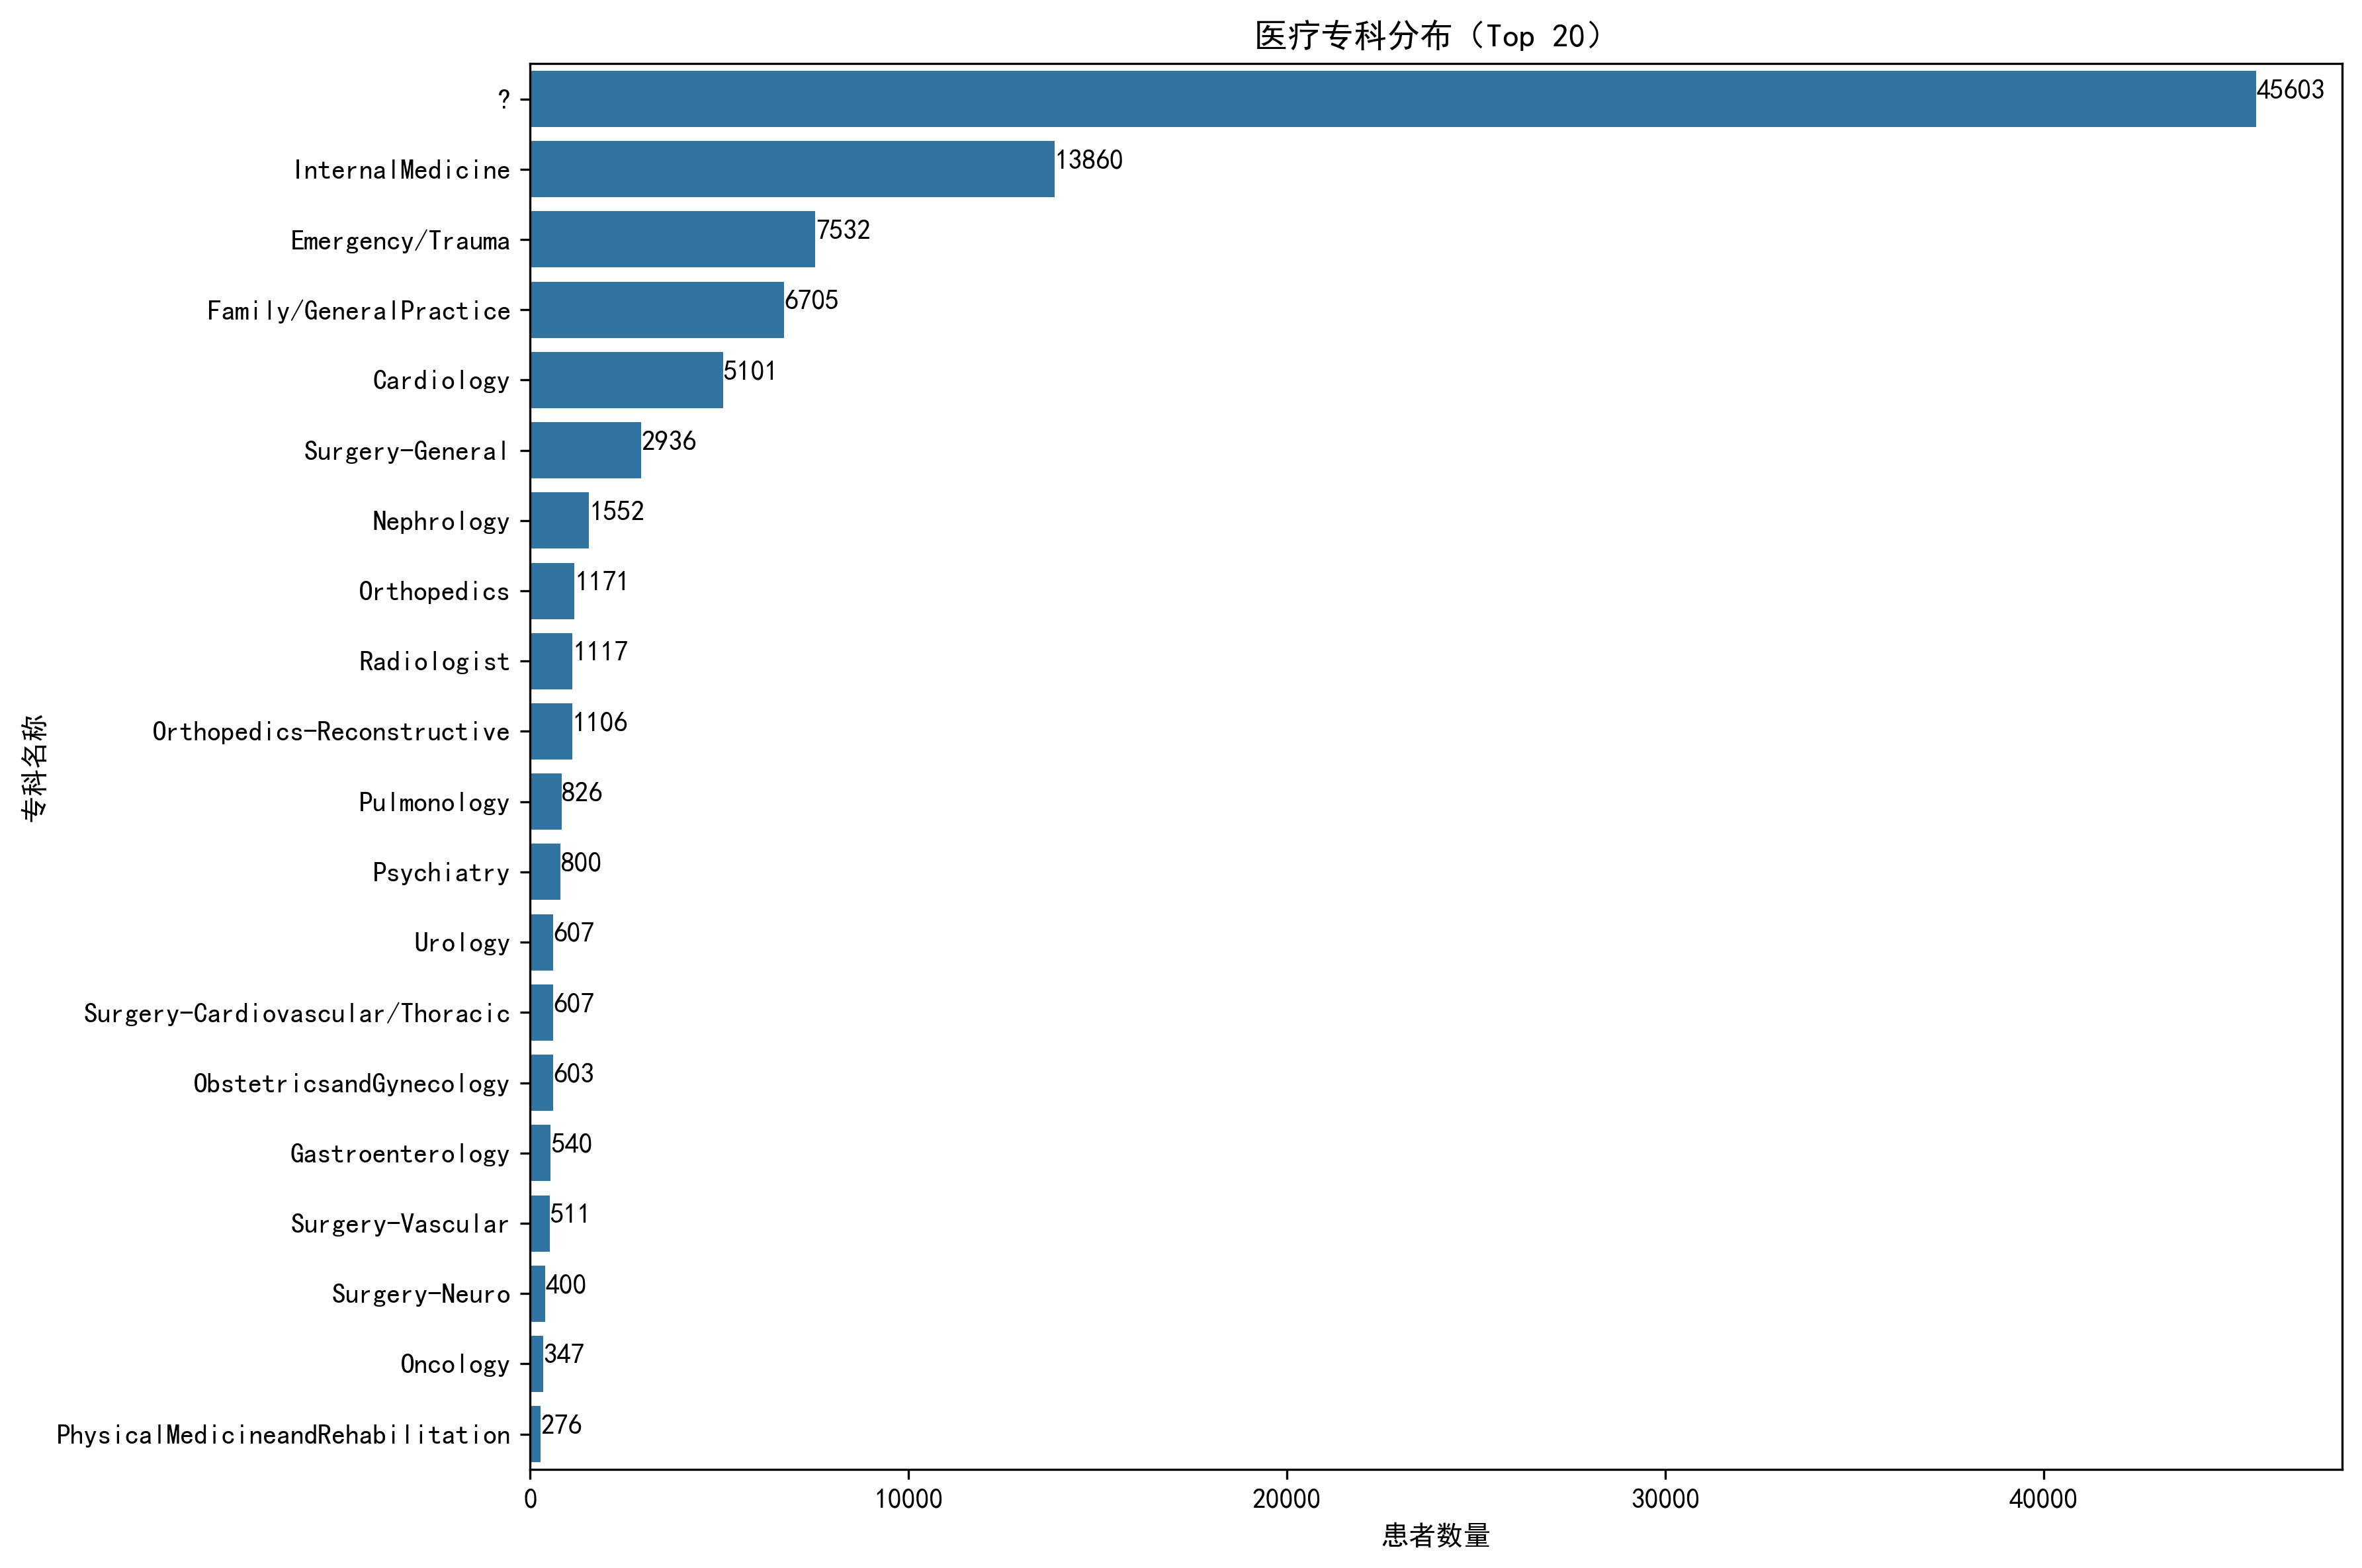

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['figure.dpi'] = 300

plt.figure(figsize=(12, 8))

# 绘制前20个类别的柱状图
sns.barplot(x=specialty_counts.head(20).values, 
            y=specialty_counts.head(20).index)

# 添加数据标签
for i, v in enumerate(specialty_counts.head(20).values):
    plt.text(v + 10, i, str(v), color='black', fontsize=10)

plt.title('医疗专科分布（Top 20）')
plt.xlabel('患者数量')
plt.ylabel('专科名称')
plt.tight_layout()
plt.show()

In [263]:
# 查看编码结果与原始值的映射关系
race_mapping = dict(enumerate(pd.factorize(diabetic_data['medical_specialty'])[1]))
# print("编码映射关系：")
for code, race in race_mapping.items():
    print(f"{code}: {race}")

0: ?
1: InternalMedicine
2: Family/GeneralPractice
3: Cardiology
4: Surgery-General
5: Orthopedics
6: Gastroenterology
7: Nephrology
8: Psychiatry
9: Orthopedics-Reconstructive
10: Pulmonology
11: Surgery-Neuro
12: Obsterics&Gynecology-GynecologicOnco
13: Pediatrics-CriticalCare
14: Endocrinology
15: Urology
16: Radiology
17: Pediatrics-Endocrinology
18: ObstetricsandGynecology
19: Pediatrics
20: Pediatrics-Hematology-Oncology
21: Surgery-Cardiovascular/Thoracic
22: Anesthesiology-Pediatric
23: Emergency/Trauma
24: Psychology
25: Neurology
26: Hematology/Oncology
27: Psychiatry-Child/Adolescent
28: Surgery-Colon&Rectal
29: Podiatry
30: Pediatrics-Pulmonology
31: Gynecology
32: Oncology
33: Pediatrics-Neurology
34: Surgery-Plastic
35: Surgery-Thoracic
36: Surgery-PlasticwithinHeadandNeck
37: Ophthalmology
38: Surgery-Pediatric
39: Pediatrics-EmergencyMedicine
40: PhysicalMedicineandRehabilitation
41: Otolaryngology
42: InfectiousDiseases
43: Anesthesiology
44: AllergyandImmunology
45: S

In [264]:
# 将 medical_specialty 列转换为 整数编码
diabetic_data['medical_specialty'] = pd.factorize(diabetic_data['medical_specialty'])[0]

In [265]:
diabetic_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,0,0,1,1,1,7,3,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,1,0,2,1,1,7,2,0,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,0,1,3,1,1,7,2,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,0,1,4,1,1,7,1,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,0,1,5,2,1,2,3,0,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99488,443847548,100162476,1,1,7,1,3,7,3,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
99489,443847782,74694222,1,0,8,1,4,5,5,0,...,No,Steady,No,No,No,No,No,No,Yes,NO
99490,443854148,41088789,0,1,7,1,1,7,1,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
99491,443857166,31693671,0,0,8,2,3,7,10,4,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [266]:
specialty_counts = diabetic_data['num_lab_procedures'].value_counts()
specialty_counts

num_lab_procedures
1      3047
43     2600
44     2293
45     2181
38     2065
       ... 
121       1
107       1
120       1
129       1
118       1
Name: count, Length: 118, dtype: int64

In [267]:
specialty_counts = diabetic_data['num_procedures'].value_counts()
specialty_counts

num_procedures
0    43427
1    19304
2    11795
3     8653
6     4513
4     3844
5     2781
Name: count, dtype: int64

In [268]:
specialty_counts = diabetic_data['num_medications'].value_counts()
specialty_counts

num_medications
13    5616
12    5555
15    5410
11    5337
14    5329
      ... 
70       2
75       2
81       1
79       1
74       1
Name: count, Length: 75, dtype: int64

In [269]:
diabetic_data['num_medications'].max()

81

In [270]:
specialty_counts = diabetic_data['number_outpatient'].value_counts()
specialty_counts

number_outpatient
0     78162
1      8222
2      3476
3      1974
4      1061
5       514
6       293
7       154
8        97
9        82
10       56
11       41
12       30
13       30
14       28
15       20
16       15
17        8
21        7
20        7
18        5
22        5
19        3
27        3
24        3
26        2
23        2
25        2
33        2
35        2
36        2
29        2
34        1
39        1
42        1
28        1
37        1
38        1
40        1
Name: count, dtype: int64

In [271]:
diabetic_data['number_outpatient'].max()

42

In [272]:
specialty_counts = diabetic_data['number_emergency'].value_counts()
specialty_counts

number_emergency
0     83198
1      7487
2      1989
3       713
4       369
5       189
6        93
7        73
8        50
10       34
9        33
11       23
13       12
12       10
22        6
16        5
18        5
19        4
20        4
15        3
14        3
25        2
21        2
28        1
42        1
46        1
76        1
37        1
64        1
63        1
54        1
24        1
29        1
Name: count, dtype: int64

In [273]:
diabetic_data['number_emergency'].max()

76

In [274]:
specialty_counts = diabetic_data['number_inpatient'].value_counts()
specialty_counts

number_inpatient
0     62264
1     18284
2      7105
3      3208
4      1521
5       775
6       462
7       259
8       144
9       107
10       57
11       49
12       33
13       20
14       10
15        9
16        6
19        2
21        1
18        1
Name: count, dtype: int64

In [275]:
diabetic_data['number_inpatient'].max()

21

In [276]:
specialty_counts = diabetic_data['diag_1'].value_counts()
specialty_counts

diag_1
428    6341
414    5872
786    3650
486    3295
410    3231
       ... 
870       1
385       1
347       1
375       1
V51       1
Name: count, Length: 712, dtype: int64

In [277]:
diabetic_data['diag_1'].nunique()

712

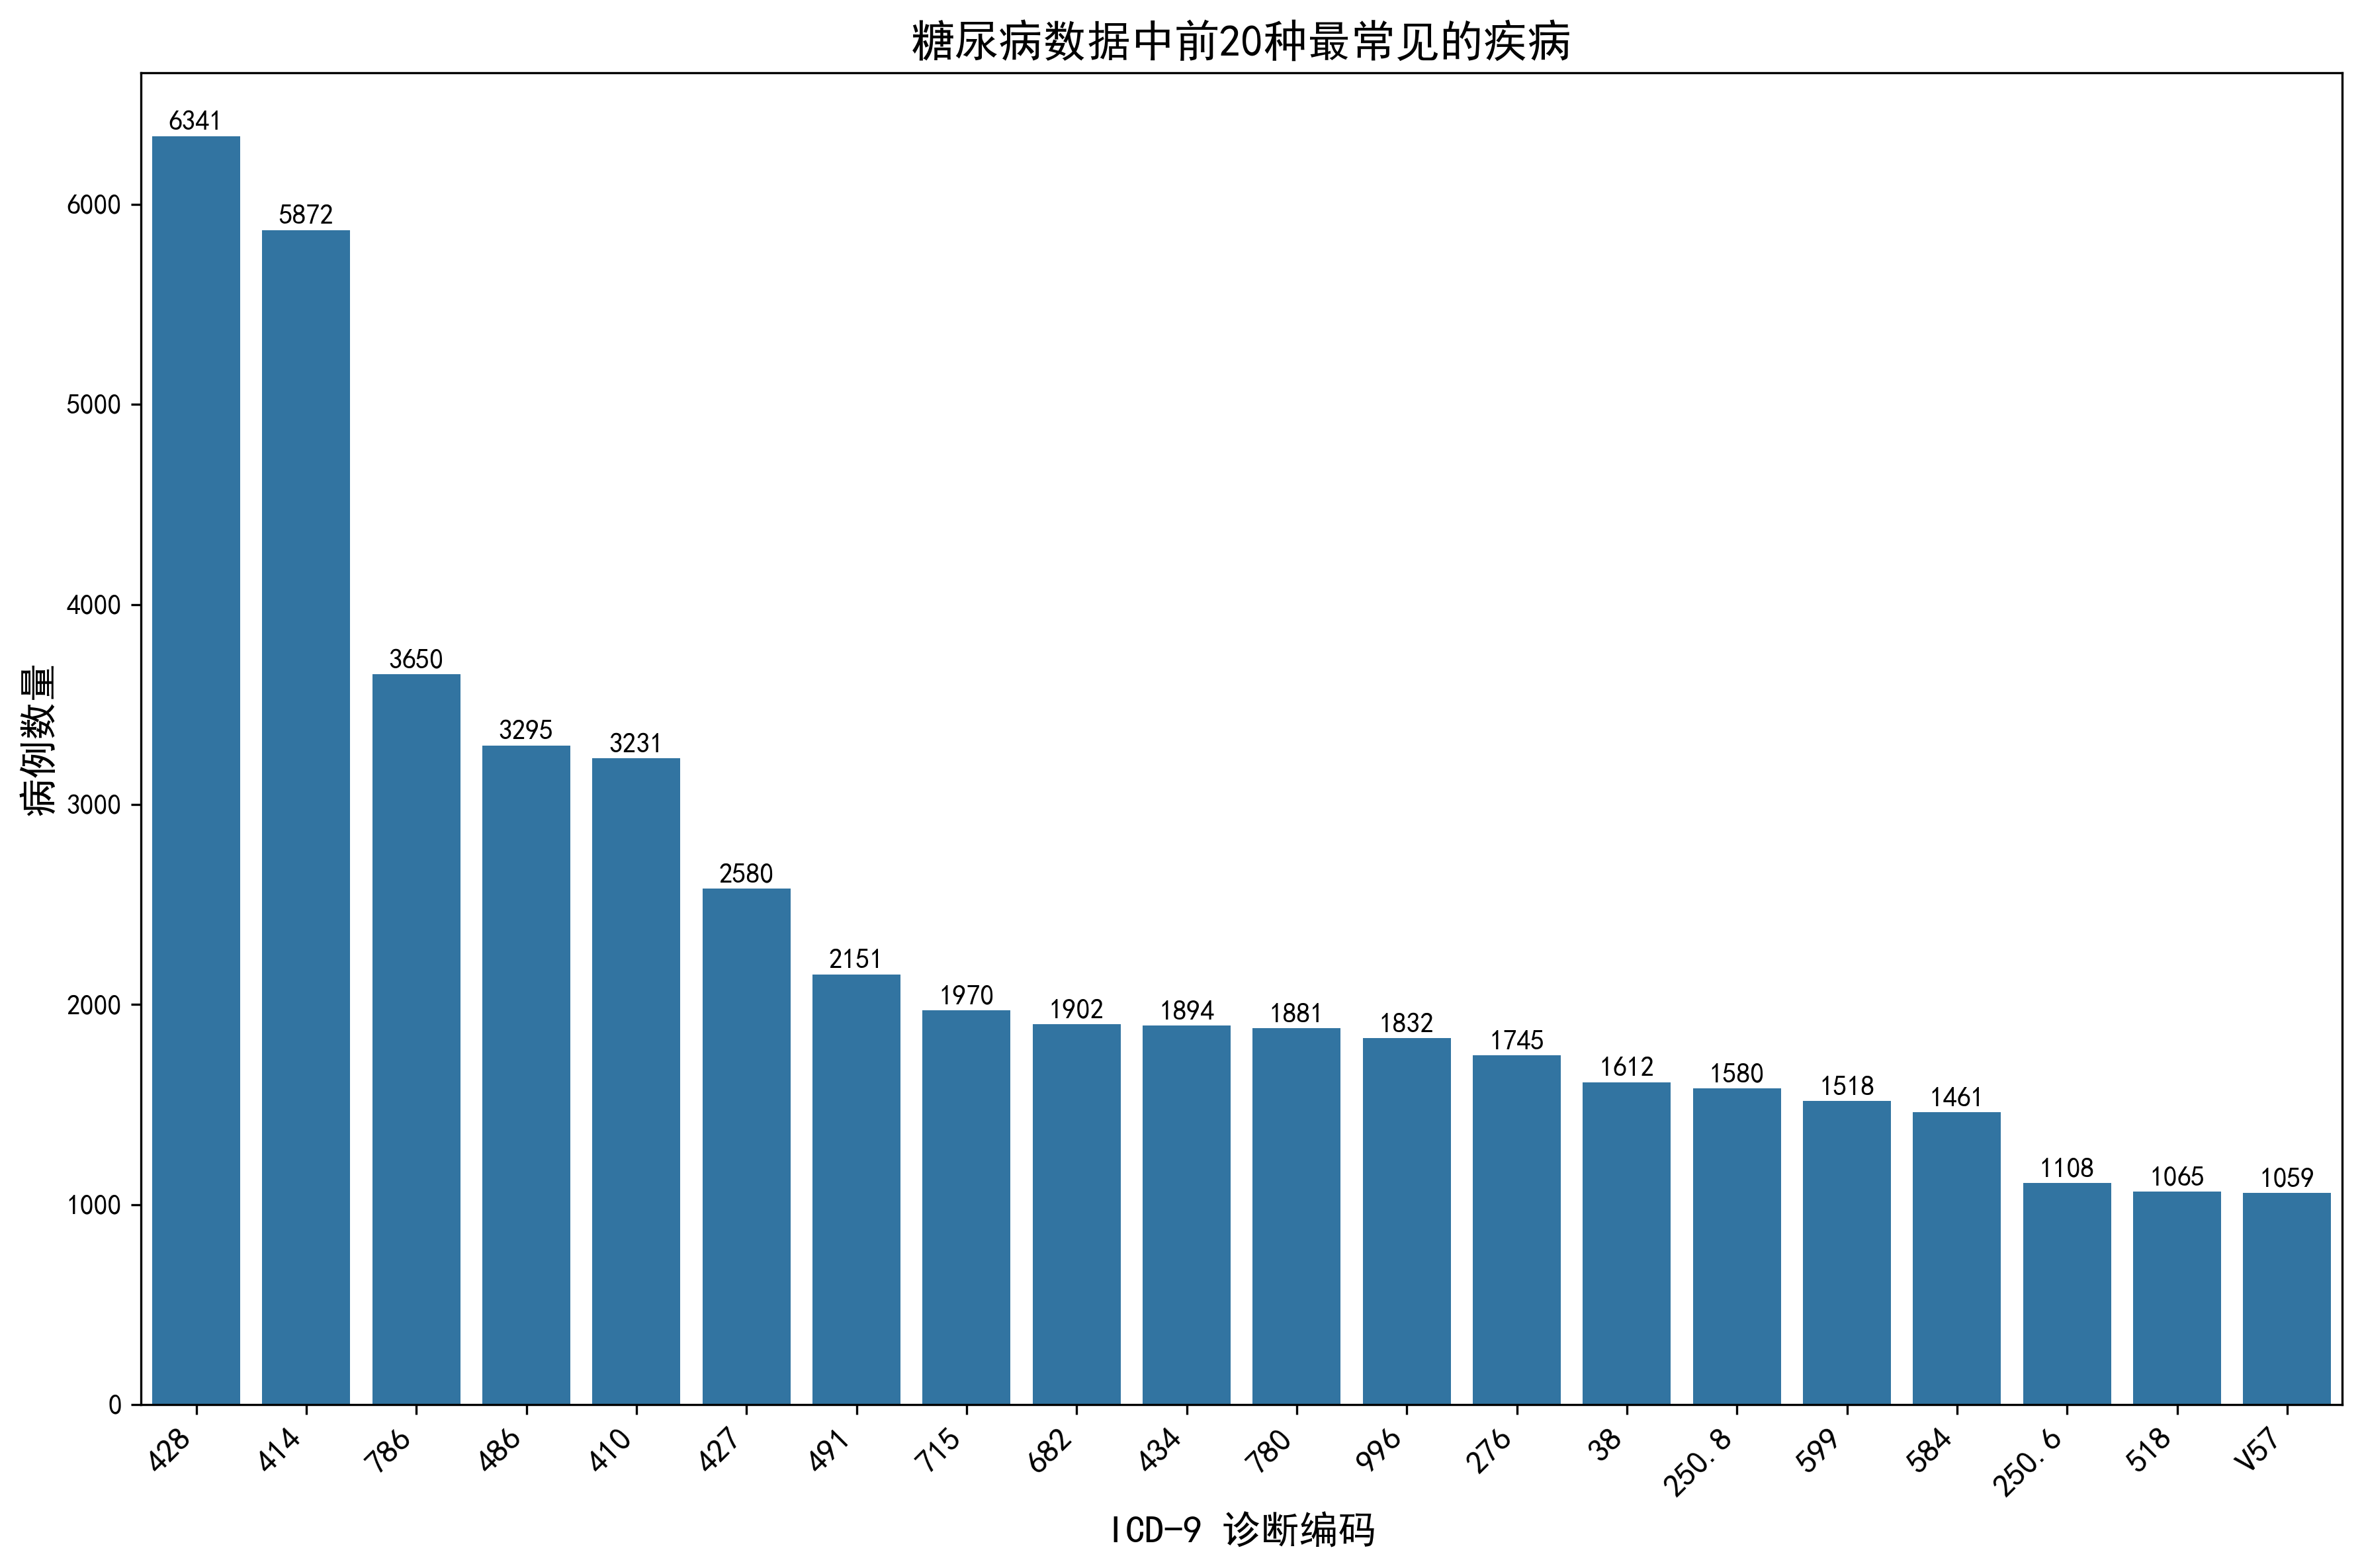

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False  
# 计算前10种最常见的疾病
specialty_counts = diabetic_data['diag_1'].value_counts().head(20)

plt.figure(figsize=(12, 8))

ax = sns.barplot(x=specialty_counts.index, y=specialty_counts.values)

# 添加数据标签
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('糖尿病数据中前20种最常见的疾病', fontsize=16)
plt.xlabel('ICD-9 诊断编码', fontsize=14)
plt.ylabel('病例数量', fontsize=14)

# 旋转x轴标签以便更好显示
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()

In [279]:
diabetic_data[diabetic_data['diag_1']=='?']

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1229,8927178,520452,0,1,6,3,1,1,3,15,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
1448,10122996,3650130,1,1,6,3,1,1,5,15,...,No,No,No,No,No,No,No,Ch,Yes,NO
3126,20095914,916947,1,1,7,3,5,1,1,15,...,No,Steady,No,No,No,No,No,No,Yes,>30
19395,70017684,104694696,0,1,6,1,1,7,4,0,...,No,No,No,No,No,No,No,No,Yes,>30
31625,103561398,23460408,0,1,5,1,1,17,4,26,...,No,No,No,No,No,No,No,No,No,NO
36499,117010956,25300467,4,1,4,1,2,1,4,0,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
48259,149775366,59039082,0,1,8,1,3,7,4,0,...,No,No,No,No,No,No,No,No,Yes,<30
55645,162996168,41539860,0,1,7,3,3,1,6,7,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
55772,163172034,27758448,0,0,8,1,1,1,2,0,...,No,Steady,No,No,No,No,No,No,Yes,NO
56450,164326842,39688524,1,1,4,3,7,7,3,23,...,No,Down,No,No,No,No,No,Ch,Yes,NO


In [280]:
diabetic_data[diabetic_data['diag_2']=='?']

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
61,715086,3376278,0,1,1,1,5,7,1,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
902,7178106,4688325,0,1,1,2,1,1,2,13,...,No,Down,No,No,No,No,No,Ch,Yes,NO
937,7331322,6325848,4,1,2,1,1,7,4,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
965,7500936,1070622,0,1,0,2,1,1,1,13,...,No,Steady,No,No,No,No,No,No,Yes,NO
973,7568742,6150186,1,1,1,2,1,1,2,17,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97417,415526432,43332570,0,1,7,1,1,7,2,0,...,No,No,No,No,No,No,No,No,Yes,>30
98325,427825172,39827439,0,0,7,1,22,7,2,1,...,No,Up,No,No,No,No,No,Ch,Yes,<30
98552,430828958,146717159,0,0,0,3,1,1,3,0,...,No,Steady,No,No,No,No,No,No,Yes,NO
98943,436145102,105360030,0,1,8,1,3,7,2,0,...,No,No,No,No,No,No,No,Ch,Yes,>30


In [281]:
diabetic_data[diabetic_data['diag_3']=='?']

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
61,715086,3376278,0,1,1,1,5,7,1,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
181,2595612,89193870,0,0,4,0,1,7,2,0,...,No,No,No,No,No,No,No,No,No,>30
476,4232790,83120292,1,0,4,3,1,2,2,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
854,6896670,59648958,1,0,2,1,1,7,3,0,...,No,Steady,No,No,No,No,No,No,Yes,<30
902,7178106,4688325,0,1,1,2,1,1,2,13,...,No,Down,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98552,430828958,146717159,0,0,0,3,1,1,3,0,...,No,Steady,No,No,No,No,No,No,Yes,NO
99024,437309498,52653654,0,1,6,1,1,7,7,4,...,No,No,No,No,No,No,No,No,Yes,NO
99212,439709132,109758042,4,1,5,2,1,7,1,4,...,No,No,No,No,No,No,No,No,Yes,NO
99293,440879552,42751098,0,0,6,3,1,1,5,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [282]:
diabetic_data = diabetic_data[diabetic_data['diag_1'] != '?']

In [283]:
diabetic_data = diabetic_data[diabetic_data['diag_2'] != '?']

In [284]:
diabetic_data = diabetic_data[diabetic_data['diag_3'] != '?']

In [285]:
diabetic_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,0,0,1,1,1,7,3,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,1,0,2,1,1,7,2,0,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,0,1,3,1,1,7,2,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,0,1,4,1,1,7,1,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,0,1,5,2,1,2,3,0,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99488,443847548,100162476,1,1,7,1,3,7,3,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
99489,443847782,74694222,1,0,8,1,4,5,5,0,...,No,Steady,No,No,No,No,No,No,Yes,NO
99490,443854148,41088789,0,1,7,1,1,7,1,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
99491,443857166,31693671,0,0,8,2,3,7,10,4,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [286]:
# 查看编码结果与原始值的映射关系
race_mapping = dict(enumerate(pd.factorize(diabetic_data['diag_1'])[1]))
# print("编码映射关系：")
for code, race in race_mapping.items():
    print(f"{code}: {race}")

0: 276
1: 648
2: 8
3: 197
4: 414
5: 428
6: 398
7: 434
8: 250.7
9: 157
10: 518
11: 999
12: 410
13: 682
14: 402
15: V57
16: 189
17: 786
18: 427
19: 996
20: 277
21: 584
22: 462
23: 473
24: 411
25: 174
26: 486
27: 998
28: 511
29: 432
30: 626
31: 295
32: 196
33: 250.6
34: 182
35: 845
36: 423
37: 808
38: 250.4
39: 722
40: 403
41: 784
42: 707
43: 440
44: 151
45: 715
46: 997
47: 198
48: 564
49: 38
50: 590
51: 578
52: 250.32
53: 433
54: 569
55: 185
56: 536
57: 250.13
58: 599
59: 574
60: 491
61: 560
62: 188
63: 250.8
64: 332
65: 296
66: 738
67: 593
68: 618
69: 446
70: 250.41
71: 780
72: 250.22
73: 556
74: 162
75: 401
76: 724
77: 514
78: 435
79: 789
80: 562
81: 711
82: 577
83: 250.02
84: 553
85: 202
86: 349
87: 507
88: 386
89: 156
90: 200
91: 607
92: 571
93: 288
94: 530
95: 820
96: 220
97: 210
98: 572
99: 286
100: 885
101: 661
102: 969
103: 824
104: 227
105: 404
106: 466
107: 191
108: 416
109: 535
110: 852
111: 250.82
112: 721
113: 457
114: 558
115: 250.03
116: 431
117: 340
118: 550
119: 351
120:

In [287]:
# 查看编码结果与原始值的映射关系
race_mapping = dict(enumerate(pd.factorize(diabetic_data['diag_1'])[1]))

# 创建DataFrame
mapping_df = pd.DataFrame({
    '分类id': list(race_mapping.keys()),
    '真实映射的ICD-9编码前三位': list(race_mapping.values())
})

csv_path = 'icd9_code_mapping_diag_1.csv'  
mapping_df.to_csv(csv_path, index=False, encoding='utf-8')



In [288]:
# 将 diag_1 列转换为 整数编码
diabetic_data['diag_1'] = pd.factorize(diabetic_data['diag_1'])[0]

In [289]:
# 查看编码结果与原始值的映射关系
race_mapping = dict(enumerate(pd.factorize(diabetic_data['diag_2'])[1]))

# 创建DataFrame
mapping_df = pd.DataFrame({
    '分类id': list(race_mapping.keys()),
    '真实映射的ICD-9编码前三位': list(race_mapping.values())
})

csv_path = 'icd9_code_mapping_diag_2.csv'  
mapping_df.to_csv(csv_path, index=False, encoding='utf-8')


In [290]:
# 将 diag_2 列转换为 整数编码
diabetic_data['diag_2'] = pd.factorize(diabetic_data['diag_2'])[0]

In [291]:
# 查看编码结果与原始值的映射关系
race_mapping = dict(enumerate(pd.factorize(diabetic_data['diag_3'])[1]))

# 创建DataFrame
mapping_df = pd.DataFrame({
    '分类id': list(race_mapping.keys()),
    '真实映射的ICD-9编码前三位': list(race_mapping.values())
})

csv_path = 'icd9_code_mapping_diag_3.csv'  
mapping_df.to_csv(csv_path, index=False, encoding='utf-8')


In [292]:
# 将 diag_3 列转换为 整数编码
diabetic_data['diag_3'] = pd.factorize(diabetic_data['diag_3'])[0]

In [293]:
specialty_counts = diabetic_data['number_diagnoses'].value_counts()
specialty_counts

number_diagnoses
9     47034
8      9851
5      9738
7      9559
6      9288
4      4885
3      2506
16       40
13       16
10       16
11       11
12        9
15        8
14        7
Name: count, dtype: int64

#### 有15262位患者有多次入院的情况

In [294]:
specialty_counts = diabetic_data['patient_nbr'].value_counts()
specialty_counts
not_one_patients = specialty_counts[specialty_counts != 1].index
print(not_one_patients)

Index([88785891, 23199021, 88227540, 84428613,  1660293, 92709351, 90609804,
       23398488, 88789707, 37096866,
       ...
       24356556, 41127570, 45730683,  3485250, 18214839, 23797584, 60691266,
          69912, 59681322, 39280464],
      dtype='int64', name='patient_nbr', length=15262)


In [295]:
specialty_counts = diabetic_data['max_glu_serum'].value_counts()
specialty_counts

max_glu_serum
Norm    2369
>200    1330
>300    1162
Name: count, dtype: int64

In [296]:
diabetic_data['max_glu_serum']

1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
        ... 
99488    NaN
99489    NaN
99490    NaN
99491    NaN
99492    NaN
Name: max_glu_serum, Length: 92968, dtype: object

In [299]:
diabetic_data['max_glu_serum'].fillna('None', inplace=True)

In [300]:
diabetic_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,0,0,1,1,1,7,3,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,1,0,2,1,1,7,2,0,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,0,1,3,1,1,7,2,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,0,1,4,1,1,7,1,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,0,1,5,2,1,2,3,0,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99488,443847548,100162476,1,1,7,1,3,7,3,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
99489,443847782,74694222,1,0,8,1,4,5,5,0,...,No,Steady,No,No,No,No,No,No,Yes,NO
99490,443854148,41088789,0,1,7,1,1,7,1,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
99491,443857166,31693671,0,0,8,2,3,7,10,4,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [301]:
# 查看编码结果与原始值的映射关系
race_mapping = dict(enumerate(pd.factorize(diabetic_data['max_glu_serum'])[1]))
# print("编码映射关系：")
for code, race in race_mapping.items():
    print(f"{code}: {race}")

0: None
1: >300
2: Norm
3: >200


In [302]:
specialty_counts = diabetic_data['max_glu_serum'].value_counts()
specialty_counts

max_glu_serum
None    88107
Norm     2369
>200     1330
>300     1162
Name: count, dtype: int64

In [303]:
# 将 max_glu_serum 列转换为 整数编码
diabetic_data['max_glu_serum'] = pd.factorize(diabetic_data['max_glu_serum'])[0]

### 存档保存一次

In [337]:
diabetic_data.to_csv("final_version1.csv", index=False, encoding='utf-8')

PermissionError: [Errno 13] Permission denied: 'final_version1.csv'

In [545]:
diabetic_data=pd.read_csv(r"final_version1.csv")

In [546]:
specialty_counts = diabetic_data['A1Cresult'].value_counts()
specialty_counts

A1Cresult
>8      7152
Norm    4658
>7      3494
Name: count, dtype: int64

In [547]:
diabetic_data['A1Cresult'].fillna('None', inplace=True)

In [548]:
specialty_counts = diabetic_data['A1Cresult'].value_counts()
specialty_counts

A1Cresult
None    77664
>8       7152
Norm     4658
>7       3494
Name: count, dtype: int64

In [549]:
# 查看编码结果与原始值的映射关系
race_mapping = dict(enumerate(pd.factorize(diabetic_data['A1Cresult'])[1]))
# print("编码映射关系：")
for code, race in race_mapping.items():
    print(f"{code}: {race}")

0: None
1: >7
2: >8
3: Norm


In [550]:
# 将 A1Cresult 列转换为 整数编码
diabetic_data['A1Cresult'] = pd.factorize(diabetic_data['A1Cresult'])[0]

In [551]:

# 查看编码结果与原始值的映射关系
race_mapping = dict(enumerate(pd.factorize(diabetic_data['metformin'])[1]))
# print("编码映射关系：")
for code, race in race_mapping.items():
    print(f"{code}: {race}")

0: No
1: Steady
2: Up
3: Down


In [552]:
specialty_counts = diabetic_data['metformin'].value_counts()
specialty_counts
# specialty_counts.sum()  # 无缺失值

metformin
No        74729
Steady    16783
Up          938
Down        518
Name: count, dtype: int64

In [553]:
# 将 metformin 列转换为 整数编码
diabetic_data['metformin'] = pd.factorize(diabetic_data['metformin'])[0]

In [554]:
specialty_counts = diabetic_data['repaglinide'].value_counts()
specialty_counts
# specialty_counts.sum()  # 无缺失值

repaglinide
No        91480
Steady     1339
Up          107
Down         42
Name: count, dtype: int64

In [555]:
repaglinide_mapping = {
    'No': 0,
    'Steady': 1,
    'Up': 2,
    'Down': 3
}

# 将原始值映射为新的分类
diabetic_data['repaglinide'] = diabetic_data['repaglinide'].map(repaglinide_mapping)

# # 验证映射结果
print(diabetic_data['repaglinide'].value_counts())



repaglinide
0    91480
1     1339
2      107
3       42
Name: count, dtype: int64


In [556]:

specialty_counts = diabetic_data['nateglinide'].value_counts()
specialty_counts
# specialty_counts.sum()  # 无缺失值


# 将原始值映射为新的分类
diabetic_data['nateglinide'] = diabetic_data['nateglinide'].map(repaglinide_mapping)

# # 验证映射结果
print(diabetic_data['nateglinide'].value_counts())

diabetic_data['nateglinide'].value_counts().sum()

nateglinide
0    92281
1      653
2       23
3       11
Name: count, dtype: int64


92968

In [557]:

# 查看编码结果与原始值的映射关系
race_mapping = dict(enumerate(pd.factorize(diabetic_data['nateglinide'])[1]))
# print("编码映射关系：")
for code, race in race_mapping.items():
    print(f"{code}: {race}")

0: 0
1: 1
2: 3
3: 2


In [558]:


specialty_counts = diabetic_data['chlorpropamide'].value_counts()
specialty_counts
specialty_counts.sum()  # 无缺失值


# 将原始值映射为新的分类
diabetic_data['chlorpropamide'] = diabetic_data['chlorpropamide'].map(repaglinide_mapping)


diabetic_data['chlorpropamide'].value_counts()

chlorpropamide
0    92907
1       56
2        4
3        1
Name: count, dtype: int64

In [559]:

specialty_counts = diabetic_data['glimepiride'].value_counts()
specialty_counts
specialty_counts.sum()  # 无缺失值


# # 将原始值映射为新的分类
diabetic_data['glimepiride'] = diabetic_data['glimepiride'].map(repaglinide_mapping)


diabetic_data['glimepiride'].value_counts()

glimepiride
0    88129
1     4373
2      287
3      179
Name: count, dtype: int64

In [560]:

specialty_counts = diabetic_data['acetohexamide'].value_counts()
specialty_counts
specialty_counts.sum()  # 无缺失值
repaglinide_mapping={
    'No':0,
    'Steady':1
}

# 将原始值映射为新的分类
diabetic_data['acetohexamide'] = diabetic_data['acetohexamide'].map(repaglinide_mapping)


diabetic_data['acetohexamide'].value_counts()

acetohexamide
0    92967
1        1
Name: count, dtype: int64

In [561]:

specialty_counts = diabetic_data['glipizide'].value_counts()
specialty_counts
specialty_counts.sum()  # 无缺失值
repaglinide_mapping = {
    'No': 0,
    'Steady': 1,
    'Up': 2,
    'Down': 3
}

# 将原始值映射为新的分类
diabetic_data['glipizide'] = diabetic_data['glipizide'].map(repaglinide_mapping)


diabetic_data['glipizide'].value_counts()

glipizide
0    81189
1    10565
2      704
3      510
Name: count, dtype: int64

In [562]:

specialty_counts = diabetic_data['glyburide'].value_counts()
specialty_counts
specialty_counts.sum()  # 无缺失值

# 将原始值映射为新的分类
diabetic_data['glyburide'] = diabetic_data['glyburide'].map(repaglinide_mapping)


diabetic_data['glyburide'].value_counts()

glyburide
0    83700
1     8089
2      704
3      475
Name: count, dtype: int64

In [563]:
specialty_counts = diabetic_data['tolbutamide'].value_counts()
specialty_counts
specialty_counts.sum()  # 无缺失值
repaglinide_mapping={
    'No':0,
    'Steady':1
}

# 将原始值映射为新的分类
diabetic_data['tolbutamide'] = diabetic_data['tolbutamide'].map(repaglinide_mapping)


diabetic_data['tolbutamide'].value_counts()

tolbutamide
0    92946
1       22
Name: count, dtype: int64

In [564]:
specialty_counts = diabetic_data['pioglitazone'].value_counts()
specialty_counts
specialty_counts.sum()  # 无缺失值
repaglinide_mapping = {
    'No': 0,
    'Steady': 1,
    'Up': 2,
    'Down': 3
}

# 将原始值映射为新的分类
diabetic_data['pioglitazone'] = diabetic_data['pioglitazone'].map(repaglinide_mapping)


diabetic_data['pioglitazone'].value_counts()

pioglitazone
0    86124
1     6524
2      216
3      104
Name: count, dtype: int64

In [565]:
specialty_counts = diabetic_data['rosiglitazone'].value_counts()
specialty_counts
specialty_counts.sum()  # 无缺失值


# 将原始值映射为新的分类
diabetic_data['rosiglitazone'] = diabetic_data['rosiglitazone'].map(repaglinide_mapping)


diabetic_data['rosiglitazone'].value_counts()

rosiglitazone
0    87108
1     5621
2      163
3       76
Name: count, dtype: int64

In [566]:
specialty_counts = diabetic_data['acarbose'].value_counts()
specialty_counts
specialty_counts.sum()  # 无缺失值


# 将原始值映射为新的分类
diabetic_data['acarbose'] = diabetic_data['acarbose'].map(repaglinide_mapping)


diabetic_data['acarbose'].value_counts()

acarbose
0    92692
1      265
2        8
3        3
Name: count, dtype: int64

In [567]:
specialty_counts = diabetic_data['miglitol'].value_counts()
specialty_counts
specialty_counts.sum()  # 无缺失值
repaglinide_mapping = {
    'No': 0,
    'Steady': 1,
    'Up': 2,
    'Down': 3
}


# 将原始值映射为新的分类
diabetic_data['miglitol'] = diabetic_data['miglitol'].map(repaglinide_mapping)


diabetic_data['miglitol'].value_counts()

miglitol
0    92933
1       29
3        4
2        2
Name: count, dtype: int64

In [568]:
specialty_counts = diabetic_data['troglitazone'].value_counts()
specialty_counts
specialty_counts.sum()  # 无缺失值
repaglinide_mapping = {
    'No': 0,
    'Steady': 1
}


# 将原始值映射为新的分类
diabetic_data['troglitazone'] = diabetic_data['troglitazone'].map(repaglinide_mapping)


diabetic_data['troglitazone'].value_counts()

troglitazone
0    92966
1        2
Name: count, dtype: int64

In [569]:
specialty_counts = diabetic_data['tolazamide'].value_counts()
specialty_counts
specialty_counts.sum()  # 无缺失值
repaglinide_mapping = {
    'No': 0,
    'Steady': 1
}


# 将原始值映射为新的分类
diabetic_data['tolazamide'] = diabetic_data['tolazamide'].map(repaglinide_mapping)


diabetic_data['tolazamide'].value_counts()

tolazamide
0    92941
1       27
Name: count, dtype: int64

In [571]:
specialty_counts = diabetic_data['examide'].value_counts()
specialty_counts
specialty_counts.sum()  # 无缺失值
repaglinide_mapping = {
    'No': 0,
}


# # 将原始值映射为新的分类
diabetic_data['examide'] = diabetic_data['examide'].map(repaglinide_mapping)


diabetic_data['examide'].value_counts()

examide
0    92968
Name: count, dtype: int64

In [574]:
specialty_counts = diabetic_data['citoglipton'].value_counts()
specialty_counts
specialty_counts.sum()  # 无缺失值
repaglinide_mapping = {
    'No': 0,
}


# # 将原始值映射为新的分类
diabetic_data['citoglipton'] = diabetic_data['citoglipton'].map(repaglinide_mapping)


diabetic_data['citoglipton'].value_counts()

citoglipton
0    92968
Name: count, dtype: int64

In [577]:
specialty_counts = diabetic_data['insulin'].value_counts()
specialty_counts
specialty_counts.sum()  # 无缺失值
repaglinide_mapping = {
    'No': 0,
    'Steady': 1,
    'Up': 2,
    'Down': 3
}


# # # 将原始值映射为新的分类
diabetic_data['insulin'] = diabetic_data['insulin'].map(repaglinide_mapping)


diabetic_data['insulin'].value_counts()

insulin
0    42484
1    28314
3    11521
2    10649
Name: count, dtype: int64

In [580]:
specialty_counts = diabetic_data['glyburide-metformin'].value_counts()
specialty_counts
specialty_counts.sum()  # 无缺失值
repaglinide_mapping = {
    'No': 0,
    'Steady': 1,
    'Up': 2,
    'Down': 3
}


# # 将原始值映射为新的分类
diabetic_data['glyburide-metformin'] = diabetic_data['glyburide-metformin'].map(repaglinide_mapping)


diabetic_data['glyburide-metformin'].value_counts()

glyburide-metformin
0    92305
1      655
2        5
3        3
Name: count, dtype: int64

In [583]:
specialty_counts = diabetic_data['glipizide-metformin'].value_counts()
specialty_counts
specialty_counts.sum()  # 无缺失值
repaglinide_mapping = {
    'No': 0,
    'Steady': 1
}


# # # 将原始值映射为新的分类
diabetic_data['glipizide-metformin'] = diabetic_data['glipizide-metformin'].map(repaglinide_mapping)


diabetic_data['glipizide-metformin'].value_counts()

glipizide-metformin
0    92955
1       13
Name: count, dtype: int64

In [585]:
specialty_counts = diabetic_data['glimepiride-pioglitazone'].value_counts()
specialty_counts
specialty_counts.sum()  # 无缺失值
repaglinide_mapping = {
    'No': 0,
    'Steady': 1
}


# # 将原始值映射为新的分类
diabetic_data['glimepiride-pioglitazone'] = diabetic_data['glimepiride-pioglitazone'].map(repaglinide_mapping)


diabetic_data['glimepiride-pioglitazone'].value_counts()

glimepiride-pioglitazone
0    92967
1        1
Name: count, dtype: int64

In [587]:
specialty_counts = diabetic_data['metformin-rosiglitazone'].value_counts()
specialty_counts
specialty_counts.sum()  # 无缺失值
repaglinide_mapping = {
    'No': 0,
}


# # 将原始值映射为新的分类
diabetic_data['metformin-rosiglitazone'] = diabetic_data['metformin-rosiglitazone'].map(repaglinide_mapping)


diabetic_data['metformin-rosiglitazone'].value_counts()

metformin-rosiglitazone
0    92968
Name: count, dtype: int64

In [589]:
specialty_counts = diabetic_data['metformin-pioglitazone'].value_counts()
specialty_counts
specialty_counts.sum()  # 无缺失值
repaglinide_mapping = {
    'No': 0,
    'Steady':1
}


# # 将原始值映射为新的分类
diabetic_data['metformin-pioglitazone'] = diabetic_data['metformin-pioglitazone'].map(repaglinide_mapping)


diabetic_data['metformin-pioglitazone'].value_counts()

metformin-pioglitazone
0    92967
1        1
Name: count, dtype: int64

### 存档保存第二次

In [591]:
diabetic_data.to_csv("final_version2.csv", index=False, encoding='utf-8')

In [593]:
diabetic_data=pd.read_csv("final_version2.csv")

In [594]:
diabetic_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,55629189,0,0,1,1,1,7,3,0,...,0,2,0,0,0,0,0,Ch,Yes,>30
1,64410,86047875,1,0,2,1,1,7,2,0,...,0,0,0,0,0,0,0,No,Yes,NO
2,500364,82442376,0,1,3,1,1,7,2,0,...,0,2,0,0,0,0,0,Ch,Yes,NO
3,16680,42519267,0,1,4,1,1,7,1,0,...,0,1,0,0,0,0,0,Ch,Yes,NO
4,35754,82637451,0,1,5,2,1,2,3,0,...,0,1,0,0,0,0,0,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92963,443847548,100162476,1,1,7,1,3,7,3,0,...,0,3,0,0,0,0,0,Ch,Yes,>30
92964,443847782,74694222,1,0,8,1,4,5,5,0,...,0,1,0,0,0,0,0,No,Yes,NO
92965,443854148,41088789,0,1,7,1,1,7,1,0,...,0,3,0,0,0,0,0,Ch,Yes,NO
92966,443857166,31693671,0,0,8,2,3,7,10,4,...,0,2,0,0,0,0,0,Ch,Yes,NO


In [595]:
diabetic_data=diabetic_data.drop([
'acetohexamide',
    'tolbutamide',
    'miglitol',
    'troglitazone',
    'tolazamide',
    'examide',
    'citoglipton',
    'glipizide-metformin',
    
    'glimepiride-pioglitazone',
    'metformin-rosiglitazone',
    'metformin-pioglitazone'
],axis=1)

In [596]:
diabetic_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,glyburide-metformin,change,diabetesMed,readmitted
0,149190,55629189,0,0,1,1,1,7,3,0,...,0,0,0,0,0,2,0,Ch,Yes,>30
1,64410,86047875,1,0,2,1,1,7,2,0,...,1,0,0,0,0,0,0,No,Yes,NO
2,500364,82442376,0,1,3,1,1,7,2,0,...,0,0,0,0,0,2,0,Ch,Yes,NO
3,16680,42519267,0,1,4,1,1,7,1,0,...,1,0,0,0,0,1,0,Ch,Yes,NO
4,35754,82637451,0,1,5,2,1,2,3,0,...,0,0,0,0,0,1,0,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92963,443847548,100162476,1,1,7,1,3,7,3,0,...,0,0,0,0,0,3,0,Ch,Yes,>30
92964,443847782,74694222,1,0,8,1,4,5,5,0,...,0,0,0,0,0,1,0,No,Yes,NO
92965,443854148,41088789,0,1,7,1,1,7,1,0,...,0,0,0,0,0,3,0,Ch,Yes,NO
92966,443857166,31693671,0,0,8,2,3,7,10,4,...,1,0,1,0,0,2,0,Ch,Yes,NO


In [597]:
specialty_counts = diabetic_data['change'].value_counts()
specialty_counts

change
No    49425
Ch    43543
Name: count, dtype: int64

In [598]:
# 将 change 列转换为 整数编码
diabetic_data['change'] = pd.factorize(diabetic_data['change'])[0]

In [599]:
specialty_counts = diabetic_data['change'].value_counts()
specialty_counts

change
1    49425
0    43543
Name: count, dtype: int64

In [601]:
specialty_counts = diabetic_data['diabetesMed'].value_counts()
specialty_counts

diabetesMed
Yes    71931
No     21037
Name: count, dtype: int64

In [602]:
# 将 diabetesMed 列转换为 整数编码
diabetic_data['diabetesMed'] = pd.factorize(diabetic_data['diabetesMed'])[0]

In [603]:
specialty_counts = diabetic_data['diabetesMed'].value_counts()
specialty_counts

diabetesMed
0    71931
1    21037
Name: count, dtype: int64

In [606]:
specialty_counts = diabetic_data['readmitted'].value_counts()
specialty_counts

readmitted
NO     49404
>30    33101
<30    10463
Name: count, dtype: int64

In [608]:
# 将 readmitted 列转换为 整数编码
diabetic_data['readmitted'] = pd.factorize(diabetic_data['readmitted'])[0]

In [610]:
diabetic_data.to_csv("final_version3.csv", index=False, encoding='utf-8')

## 绘图看关系

In [688]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

plt.style.use('seaborn-whitegrid')
sns.set_palette("Set2")

plt.rcParams.update({
    'font.size': 8,
    'axes.labelsize': 5,
    'axes.titlesize': 5,
    'xtick.labelsize': 5,
    'ytick.labelsize': 5,
    'legend.fontsize': 5,
    'figure.dpi': 300,
    'figure.figsize': (3, 2),
    'savefig.dpi': 100
})
plt.rcParams['font.sans-serif'] = ['SimHei']

C:\Users\李亚群\AppData\Local\Temp\ipykernel_23836\955227547.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### 年龄分布直方图

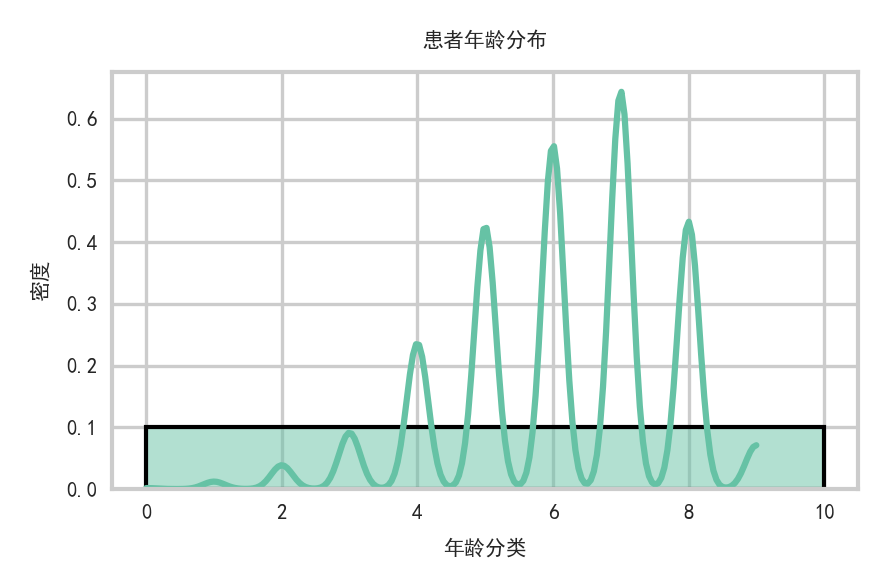

In [689]:
plt.figure()
age_bins = np.arange(0, diabetic_data['age'].max()+10, 10)
sns.histplot(diabetic_data['age'], bins=age_bins, kde=True, stat='density')
plt.title('患者年龄分布')
plt.xlabel('年龄分类')
plt.ylabel('密度')
plt.tight_layout()
plt.show()
plt.close()

# 6 7 8 这个分类中的患者数较多

### 住院时间与实验室检查次数关系图

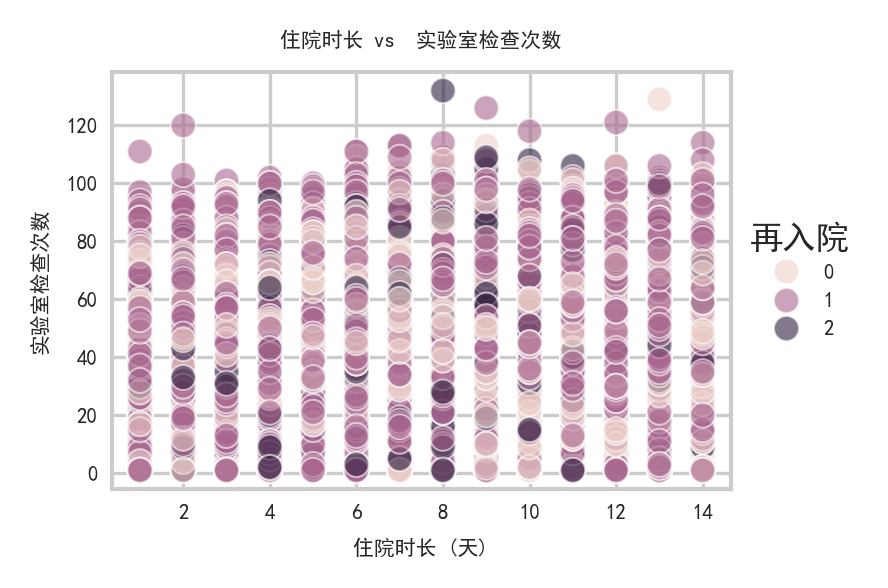

In [692]:
plt.figure()
sns.scatterplot(x='time_in_hospital', y='num_lab_procedures', 
                data=diabetic_data, alpha=0.6, hue='readmitted')
# 通过颜色区分是否再次入院（readmitted）
plt.title('住院时长 vs 实验室检查次数')
plt.xlabel('住院时长 (天)')
plt.ylabel('实验室检查次数')

# 调整图例位置，将其放置在图形右侧外部
plt.legend(title='再入院', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()
plt.close()

### 药物使用数量箱线图

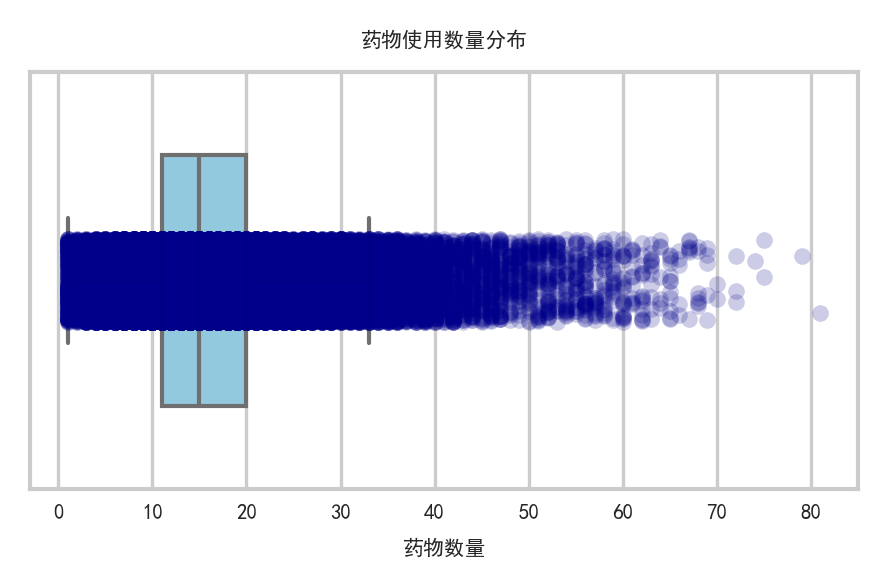

In [694]:
plt.figure()
sns.boxplot(x='num_medications', data=diabetic_data, color='skyblue', 
            showfliers=False, width=0.6)
sns.stripplot(x='num_medications', data=diabetic_data, color='darkblue', 
              alpha=0.2, size=4, jitter=True)
plt.title('药物使用数量分布')
plt.xlabel('药物数量')
plt.tight_layout()
plt.show()
plt.close()

# 药物数量大概在0-33分布较多

### 种族分布饼图

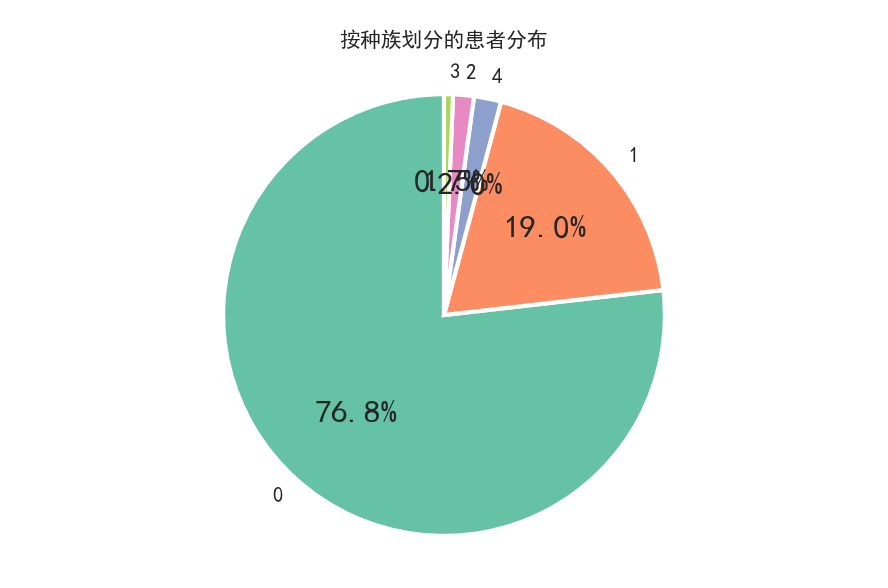

In [697]:
plt.figure()
race_counts = diabetic_data['race'].value_counts()
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%',
        startangle=90, wedgeprops={'edgecolor': 'w', 'linewidth': 1})
plt.title('按种族划分的患者分布')
plt.axis('equal')
plt.tight_layout()
plt.show()
plt.close()


# 0: Caucasian
# 1: AfricanAmerican
# 2: Other
# 3: Asian
# 4: Hispanic
# 0 Caucasian 人群较多

C:\Users\李亚群\AppData\Local\Temp\ipykernel_23836\2714576812.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=med, y='readmitted', data=diabetic_data, ax=axes[i], ci=None)
C:\Users\李亚群\AppData\Local\Temp\ipykernel_23836\2714576812.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=med, y='readmitted', data=diabetic_data, ax=axes[i], ci=None)
C:\Users\李亚群\AppData\Local\Temp\ipykernel_23836\2714576812.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=med, y='readmitted', data=diabetic_data, ax=axes[i], ci=None)
C:\Users\李亚群\AppData\Local\Temp\ipykernel_23836\2714576812.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=med, y='readmitted', data=diabetic_data, ax=axes[i], ci=None)
C:\Users\李亚群\AppData\Local\Temp\ipykernel_23836\27145768

<Figure size 900x600 with 0 Axes>

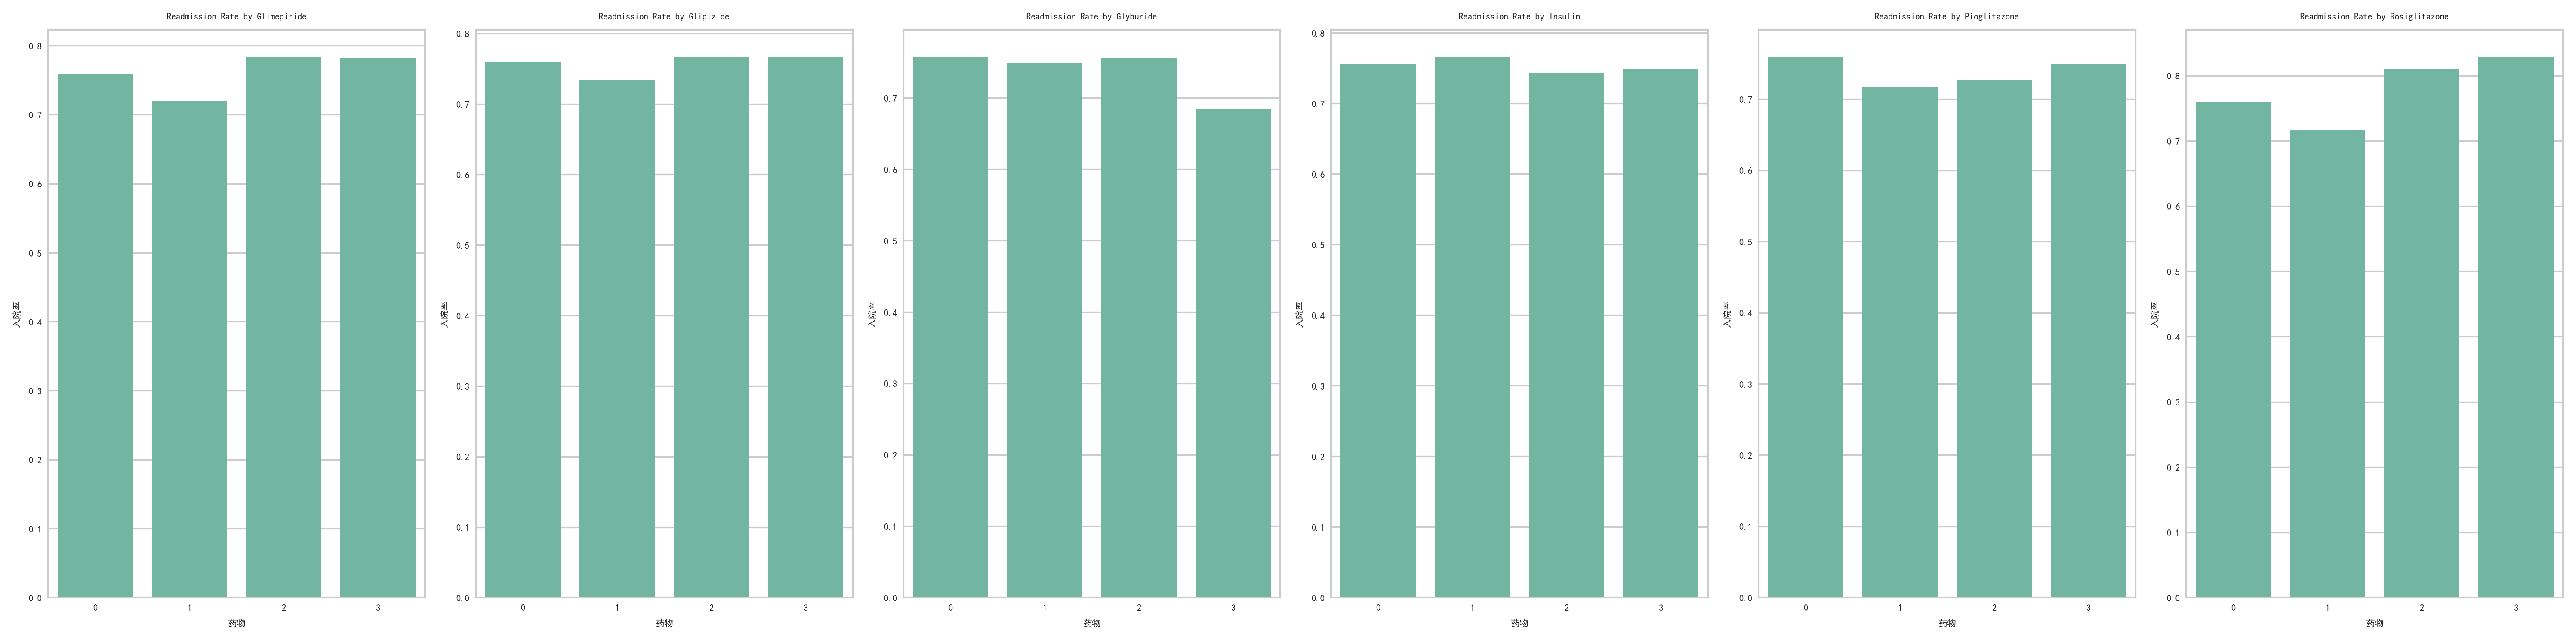

In [703]:
#  再入院率与糖尿病药物使用关系图
plt.figure()
# 我选这几个变量 觉得这几个变量相对重要一些 数据更有意义
meds = ['glimepiride', 'glipizide','glyburide','insulin','pioglitazone','rosiglitazone']
fig, axes = plt.subplots(1, len(meds), figsize=(20, 5))
for i, med in enumerate(meds):
    sns.barplot(x=med, y='readmitted', data=diabetic_data, ax=axes[i], ci=None)
    axes[i].set_title(f'Readmission Rate by {med.capitalize()}')
    axes[i].set_xlabel('药物')
    axes[i].set_ylabel('入院率')
plt.tight_layout()
plt.show()
plt.close()

### 诊断次数与再入院关系热力图

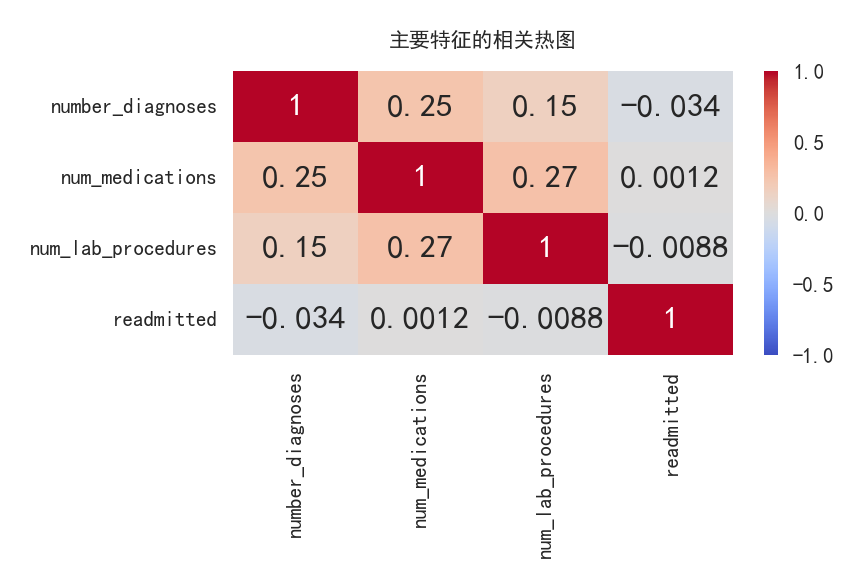

In [706]:
plt.figure()
corr_matrix = diabetic_data[['number_diagnoses', 'num_medications', 
                 'num_lab_procedures', 'readmitted']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('主要特征的相关热图')
plt.tight_layout()
plt.show()
plt.close()

### 不同入院类型的住院时间比较

C:\Users\李亚群\AppData\Local\Temp\ipykernel_23836\498983625.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='admission_type_id', y='time_in_hospital',


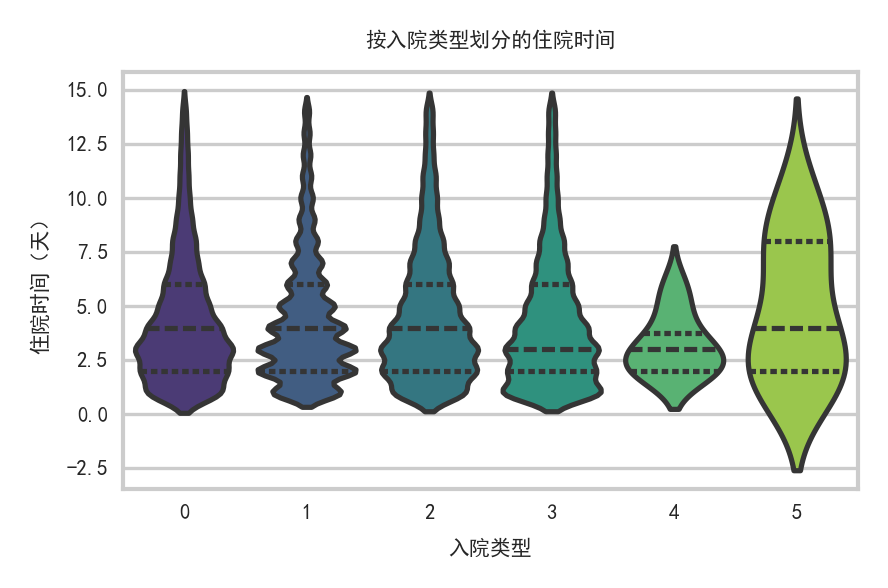

In [720]:
plt.figure()
sns.violinplot(x='admission_type_id', y='time_in_hospital', 
               data=diabetic_data, inner='quartile', palette='viridis')
plt.title('按入院类型划分的住院时间')
plt.xlabel('入院类型')
plt.ylabel('住院时间（天）')

plt.tight_layout()
plt.show()
plt.close()

# 重点关注第五类入院类型：Trauma Center创伤中心
# 这里明明入院类型对应的住院时间都是正数  但是绘图出来有负值  这里我也不知道为什么

C:\Users\李亚群\AppData\Local\Temp\ipykernel_23836\1736766151.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1)` for the same effect.

  sns.pointplot(x='number_emergency', y='readmitted',


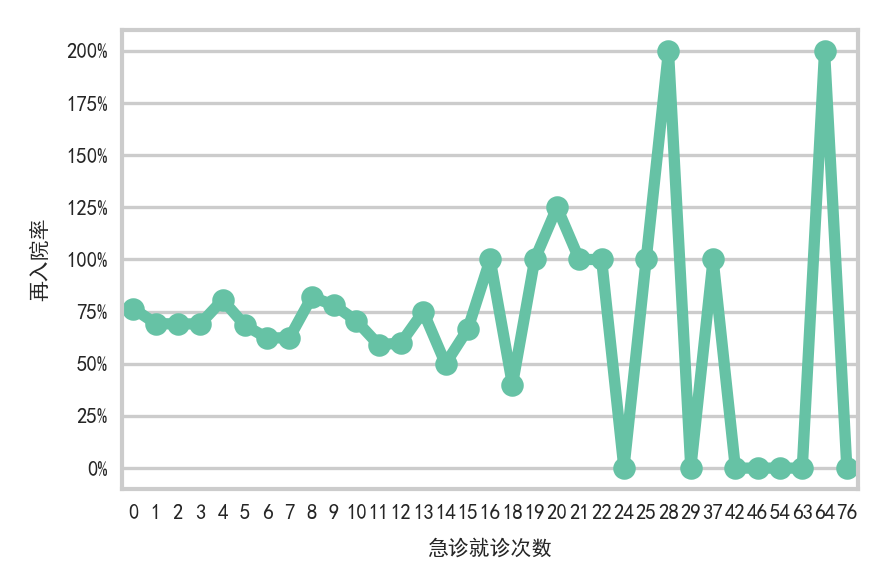

In [729]:

# 急诊次数与再入院率关系图
plt.figure()
sns.pointplot(x='number_emergency', y='readmitted', 
              data=diabetic_data, ci=1, capsize=0.01,markers='.')

plt.xlabel('急诊就诊次数')
plt.ylabel('再入院率')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
plt.tight_layout()
plt.show()
plt.close()